In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 


2025-02-25 00:41:01.478804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
print(os.getcwd())
curr_dir=os.getcwd()
train_path= os.path.join(curr_dir,"dataset","Train")
test_path= os.path.join(curr_dir,"dataset","Test")
valid_path= os.path.join(curr_dir,"dataset","Valid")

/Users/dexter/Desktop/AICTE-Internship-files-main/3.Potato Leaf Disease Detection


In [3]:
training_set= tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    #batch_size=32// needed when their is very large dataset
    image_size=(128,128),
    shuffle=True,
    interpolation='bilinear',
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128,128),
    shuffle=True,
    interpolation='bilinear',
)

Found 300 files belonging to 3 classes.


In [6]:
cnn= tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
cnn.summary
print(cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
training_history=cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5605 - loss: 0.9257 - val_accuracy: 0.3300 - val_loss: 1.0667
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3601 - loss: 1.1636 - val_accuracy: 0.3367 - val_loss: 1.0609
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4330 - loss: 0.9906 - val_accuracy: 0.7100 - val_loss: 0.6480
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6390 - loss: 0.7696 - val_accuracy: 0.7400 - val_loss: 0.5568
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7381 - loss: 0.6214 - val_accuracy: 0.7800 - val_loss: 0.4655
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7455 - loss: 0.5464 - val_accuracy: 0.8433 - val_loss: 0.3981
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8216 - loss: 0.4352 - val_accuracy: 0.8767 - val_loss: 0.4335
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7982 - loss: 0.5022 - val_accuracy: 0.8333 - val_loss:

In [11]:
train_loss,train_acc= cnn.evaluate(training_set)
print("Training accuracy: ",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.9018 - loss: 0.2407
Training accuracy:  0.902222216129303


In [12]:
val_loss,val_acc= cnn.evaluate(validation_set)
print("Validation accuracy: ",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8812 - loss: 0.2978
Validation accuracy:  0.8700000047683716


In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'accuracy': [0.6155555844306946,
  0.38999998569488525,
  0.5055555701255798,
  0.6555555462837219,
  0.7477777600288391,
  0.7566666603088379,
  0.8322222232818604,
  0.8144444227218628,
  0.8500000238418579,
  0.8277778029441833],
 'loss': [0.8427400588989258,
  1.1281594038009644,
  0.9590073227882385,
  0.7339004874229431,
  0.6016638278961182,
  0.546036958694458,
  0.41928935050964355,
  0.44000911712646484,
  0.3670288026332855,
  0.4201366603374481],
 'val_accuracy': [0.33000001311302185,
  0.33666667342185974,
  0.7099999785423279,
  0.7400000095367432,
  0.7799999713897705,
  0.8433333039283752,
  0.8766666650772095,
  0.8333333134651184,
  0.8600000143051147,
  0.8700000047683716],
 'val_loss': [1.0667014122009277,
  1.0608867406845093,
  0.6480301022529602,
  0.5567904114723206,
  0.4654557704925537,
  0.3980991840362549,
  0.43349015712738037,
  0.38910114765167236,
  0.3125283420085907,
  0.27844494581222534]}

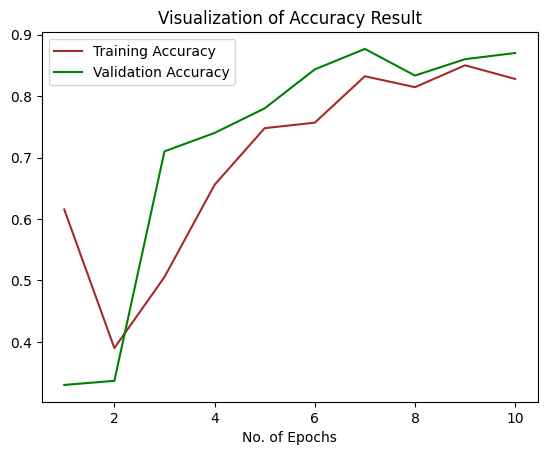

In [15]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()